<a href="https://colab.research.google.com/github/nirmalaraj77/AI-Fundamentals/blob/main/Supervised_Learning_with_skikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Machine Learning**
* Machine learning is the process whereby computers learn to make decisions from data,

* Without being explicitly programmed.

* For example, learning to predict whether an email is spam or not spam given its content and sender.

* Or learning to cluster books into different categories based on the words they contain, then assigning any new book to one of the existing clusters.


#**Unsupervised Learning**
* Uncovering hidden patters from unlabeled data.

* Example, grouping customers into distinct categories (clustering) without knowing in advance what these catgories are.


#**Supervised Learning**
* The predicted values are known.

* Aim:Predict the target value of unseen data,given the features.

* Uses labels.

#**Types of Supervised Learning**

* Classification: Target variable consists of categories (e.g. binary classification)

* Regression: Target variable is continous (predict price based on bedrooms and size)

#**Naming Conventions**
* Feature = predictor variable = independent variable

* target variable = dependent variable = response variable

#**Before using Supervised Learning**

* No missing values
* Data in numeric format
* Data stored in pandas DataFrame or NumPy array
* Perform EDA first



#**scikit-learn syntax**

* Import a Model from an sklearn module.
* Example, the k-Nearest Neighbors model uses distance between observations to predict labels or values.
* from sklearn module import model

* Create variable name model and Instantiate Model
* model = Model()

* Fit model to data where it learns patterns about the features and the target variable.
* Fit the model to X, an array of features, and y, an array of target variable values.
model.fit (X, y)

* Use the model's dot-predict method, passing six new observations, X_new.
* For example, if feeding features from six emails to a spam classification model, an array of six values is returned.
* A one indicates the model predicts that email is spam, and a zero represents a prediction of not spam.
* predictions = model.predict(X_new)

#**Build classification model, or classifier, to predict labels of unseen data**

##**There are four steps**

1. First, we build a classifier (model)

2. Model learns from the labeled data we pass to it.

3. We then pass it unlabeled data as input

4. Model predicts labels for this unseen data.

* As the classifier learns from the labeled data, we call this the training data.

##**k-Nearest Neighbours (KNN)**

* Predict the label of a data point by

  * Looking at the k closest data points.
  * Taking a majority vote

* KNN creates a decision boundary

##**Requirements**
* scikit-learn requires that the features are in an array where each column is a feature and each row a different observation.

* Similarly, the target needs to be a single column with the same number of observations as the feature data.








In [18]:
# Import libraries and datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


advertising = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/advertising_and_sales_clean.csv')
sales_df = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/advertising_and_sales_clean.csv')
diabetes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/diabetes_clean.csv')
music = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/music_clean.csv')
telecom = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/telecom_churn_clean.csv')


In [ ]:
# Using scikit-learn to fit a classifier

## Import KNN
from sklearn.neighbors import KNeighborsClassifier

## Split data into X (2D array of features day_charge, eve-Charge)
X = telecom[['total_day_charge', 'total_eve_charge']].values

## and split data into y (1D array of target values - churn)
y = telecom[['churn']].values

## Check shapes of X and y - there are 3333 observations of 2 features, and 3333 observations of the target variable.
print(X.shape, y.shape)

(3333, 2) (3333, 1)


In [ ]:
## Instantiate KNeighboursClassifier - setting n_neighbours to 15
knn = KNeighborsClassifier(n_neighbors=15)

## Fit model to data
knn.fit(X, y)

## Create set of nerw observations X_new
X_new = np.array([[56.8, 17.5],
                 [24.4, 24.1],
                  [50.1, 10.9]])

## Check shape of X_new - there are 3 observations of 2 features
print (X_new.shape)

(3, 2)


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
##  Use the classifier's .predict method and pass it the unseen data as a 2D NumPy array
predictions = knn.predict(X_new)

## Print the predictions for the new data
print("Predictions: {}".format(predictions))

## Returns a binary value for each observation or row in X_new.
## It predicts 1, which corresponds to 'churn', for the first observation,
## and 0, which corresponds to 'no churn', for the second and third observations.

Predictions: [1 0 0]


#**Measuring Model Performance**

* In classification, accuracy is a commonly-used metric.
* Number of correct predictions / total number of observations.

##**Computing accuracy**

* It is common to split data into a training set and a test set.

* We fit the classifier using the training set,

* then we calculate the model's accuracy against the test set's labels.

##**Train / test split**
* Import train_test_split from sklearn.model_selection.

* We call train_test_split, passing our features and targets.

* We commonly use 20-30% of our data as the test set - by setting the test_size argument to 0.2 - 0.3

* Random_state argument sets a seed - allows us to reproduce the exact split

* **It is best practice to ensure our split reflects the proportion of labels in our data.**

* So if churn occurs in 10% of observations, we want 10% of labels in our training and test sets to represent churn.

* We achieve this by setting stratify equal to y.

* train_test_split returns four arrays: the training data, the test data, the training labels, and the test labels.

* We unpack these into X_train, X_test, y_train, and y_test, respectively.

* We then instantiate a KNN model and fit it to the training data using the dot-fit method.

* To check the accuracy, we use the dot.score method, passing X test and y test.

* The accuracy of our model is 88%, which is low given our labels have a 9 to 1 ratio.

In [12]:
# Train/test split

## Import train/test split
from sklearn.model_selection import train_test_split

## Split data into X (2D array of features) and y (1D array of target values)
X = telecom[['total_day_charge', 'total_eve_charge']].values
y = telecom[['churn']].values

## Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

## Instantiate knn model and fit to training data
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

## Score model on test data
print(knn.score(X_test, y_test))

NameError: name 'KNeighborsClassifier' is not defined

#**Model complexity**
* Let's discuss how to interpret k.

* Recall that we discussed decision boundaries, which are thresholds for determining what label a model assigns to an observation.

* E.g. as k increases, the decision boundary is less affected by individual observations, reflecting a simpler model.

* **Simpler models are less able to detect relationships in the dataset, which is known as underfitting**.

* **In contrast, complex models can be sensitive to noise in the training data, rather than reflecting general trends. This is known as overfitting.**

#**Model complexity and over/underfitting**
* We can also interpret k using a model complexity curve.

* With a KNN model, we can calculate accuracy on the training and test sets using incremental k values, and plot the results.

* We create empty dictionaries to store our train and test accuracies, and an array containing a range of k values.

* We use a for loop to repeat our previous workflow, building several models using a different number of neighbors.

* We loop through our neighbors array and, inside the loop, we instantiate a KNN model with n_neighbors equal to the neighbor iterator, and fit to the training data.

* We then calculate training and test set accuracy, storing the results in their respective dictionaries.

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

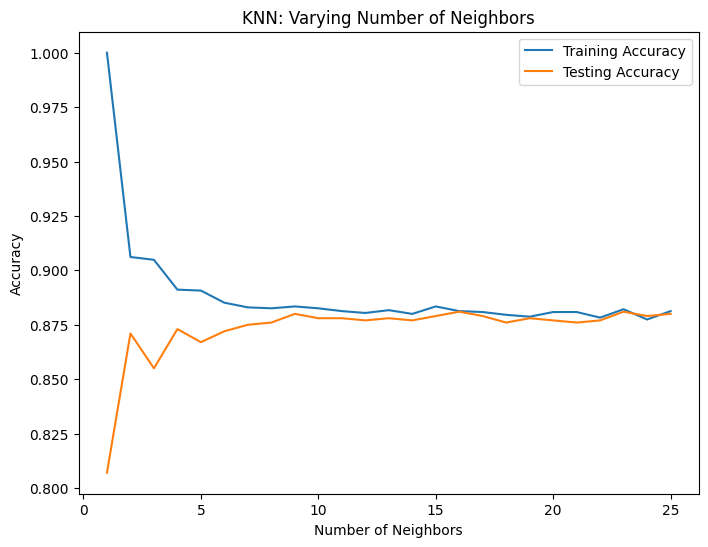

In [ ]:
# Model complexity and over/under fitting
train_accuracies = {}
test_accuracies = {}

neighbors = np.arange(1, 26)

for neighbor in neighbors:
  knn = KNeighborsClassifier(n_neighbors=neighbor)
  knn.fit(X_train, y_train)
  train_accuracies[neighbor] = knn.score(X_train, y_train)
  test_accuracies[neighbor] = knn.score(X_test, y_test)

# Plot results
plt.figure(figsize=(8,6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

## As k increases beyond 15 we see underfitting where performance plateaus on both test and training sets, as indicated in this plot.

## The peak test accuracy actually occurs at around 13 neighbors.

#**Regression**

* In regression, target variable has continuous values,

* such as a country's GDP, or the price of a house.

* scikit-learn requires features & target values in distinct variables, X and y

* scikit learn requires features in 2D array






   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
(768,) (768,)
(768, 1)


Text(0, 0.5, 'Blood Glucose (mg/dl)')

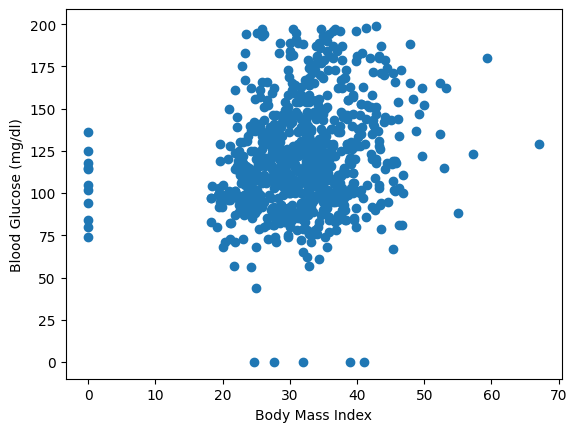

In [ ]:
# Load pandas dataset
diabetes_df = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/diabetes_clean.csv')
print(diabetes_df.head())

# Drop target (blood glucose level) and store values as X
X = diabetes_df.drop('glucose', axis=1).values

# For y, take the the target column's values attribute
y = diabetes_df['glucose'].values

# Check X and y are NumPy arrays
print (type(X), type(y))

# Predict blood glucose levels from a single feature: bmi

## slice bmi column of X (4th column)
X_bmi = X[:, 4]

## check shapes
print(y.shape, X_bmi.shape)

## format X_bmi as a 2D array by applying NumPy's .reshape menthod
X_bmi = X_bmi.reshape (-1, 1)

## check X_bmi shape
print(X_bmi.shape)


# Plot glucose vs bmi
plt.scatter(X_bmi, y)
plt.xlabel ('Body Mass Index')
plt.ylabel ('Blood Glucose (mg/dl)')


#**Fit Regression Model**

* linear regression

* As we are modeling the relationship between the feature: body mass index, and the target: blood glucose levels, rather than predicting target values for new observations, we fit the model to all of our feature observations.

* We do this by calling reg-dot-fit and passing in the feature data and the target variable, the same as we did for classification problems.

* As we are predicting the target values of the features used to train the model, this gives us a line of best fit for our data.



Text(0, 0.5, 'Blood Glucose (mg/dl)')

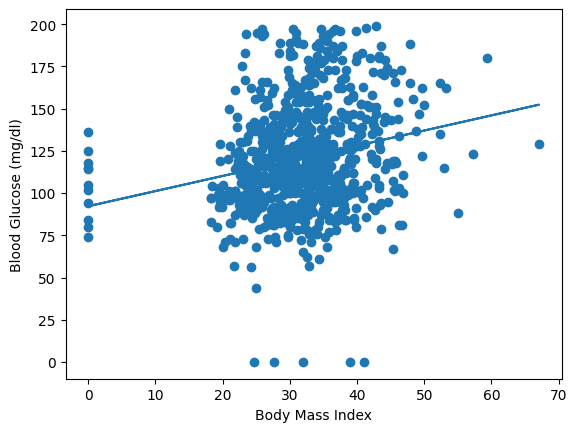

In [ ]:
# Import linear regression
from sklearn.linear_model import LinearRegression

# Instantiate regression model
reg = LinearRegression()

# Fit model to all feature observations
reg.fit(X_bmi, y)

# Create predictions variable
predictions = reg.predict (X_bmi)

# Plot scatter glucose vs bmi, with best filt line predictions

plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.xlabel ('Body Mass Index')
plt.ylabel ('Blood Glucose (mg/dl)')

# Indicates weak to moderate positve correlation



        tv     radio  social_media      sales
0  16000.0   6566.23       2907.98   54732.76
1  13000.0   9237.76       2409.57   46677.90
2  41000.0  15886.45       2913.41  150177.83
3  83000.0  30020.03       6922.30  298246.34
4  15000.0   8437.41       1406.00   56594.18
(4546, 1) (4546,)
[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


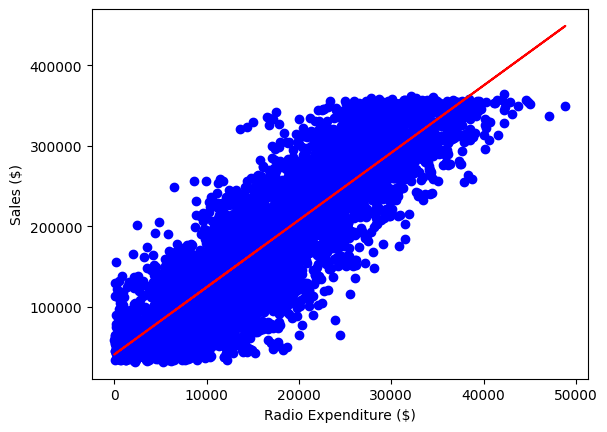

In [ ]:
# Import dataset
sales_df = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/advertising_and_sales_clean.csv')
sales_df.drop('influencer', axis='columns', inplace=True)
print(sales_df.head())

# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1, 1)

# Check the shape of the features and targets
print(X.shape, y.shape)

# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X, y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

# Create scatter plot
plt.scatter(X, y, color="blue")

# Create line plot
plt.plot(X, predictions, color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

# The model nicely captures a near-perfect linear correlation between radio advertising expenditure and sales!

#**Basics of Linear Regression**

#**2 Dimensions**

* y = ax + b

##**Simple linear regression uses 1 feature**

* y = target

* x = single feature

* a, b = parameters / coefficients of the model that we want to learn- slope, intercept.

##**How do we choose a and b**

* Define an error function for any given line

* Choose the luine that minimizes the error function

##**Error function = loss function = cost function**

##**The loss function**

* Want line as close to observations as possible

* Minimize vertical diatance between fit and data

* Calculate vertical distance between data and line = Residual

* Square the residuals = Residual Sum of Squares = RSS

* **Ordinary Least Squares = OLS**

#**Linear Regression in higher dimensions**

* y = a1x1 + a2x2 + b

##**To fit linear regression:**

* need to specify 3 variables, a1, a2, b

#**In higher dimensions:**

* known as multiple regression

* Must specify coefficients for eah feature and variable/intersect b

y = a1x1 + a2x2 + a3x3 + .... + anxn + b

#**scikit learn works exactly the same way:**

* Pass 2 arrays: feature and target

* Linear Regression on scikit learn performs OLS

* Default mteric is R-squared: quantifies the variance in target values

* values range from 0 - 1

* with one meaning the features completely explain the target's variance

* compute R-squared with model's .score method

#**Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)**

* Another way to assess a regression model's performance is to take the mean of the residual sum of squares.

* This is known as the MSE.

* MSE is measured in units of our target variable - squared.

* E.g. if a model is predicting a $ value, MSE will be in $-squared.

* To convert to $, take the square root, known as the RMSE.

#**RMSE in scikit-learn**

* To calculate RMSE, we import mean_squared_error from sklearn.metrics, #

* then call mean_squared_error.

* We pass y_test and y_pred, and set squared equal to False, which returns the square root of the MSE.

* The model has an average error for blood glucose levels of around 24 milligrams per deciliter.







In [24]:
# Linear regression using all featured from diabates dataset
diabetes = pd.read_csv('https://raw.githubusercontent.com/nirmalaraj77/AI-Fundamentals/refs/heads/main/diabetes_clean.csv')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

print(diabetes.head())

## Split data into X (2D array of features) and y (1D array of target values)
X = diabetes[['pregnancies',	'diastolic', 	'triceps',	'insulin', 'bmi', 'dpf', 'age',	'diabetes']].values
y = diabetes[['glucose']].values

## Split data into trainig and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Instantiate model
reg_all = LinearRegression()

## Fit to training data
reg_all.fit(X_train, y_train)

##Predict on test set
y_pred = reg_all.predict(X_test)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))

# Score model on test data R-squared
print(reg_all.score(X_test, y_test))

# RMSE using all featured from diabates dataset
from sklearn.metrics import mean_squared_error

## Call mean squared error
mse=mean_squared_error (y_test, y_pred)

## RMSE
import math
math.sqrt(mse)

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
Predictions: [[119.91303675]
 [ 95.70325357]], Actual Values: [[ 98]
 [112]]
0.28280468810375115


TypeError: got an unexpected keyword argument 'squared'